# RNN Recurrent Neural Network

In [5]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Flatten, Dense, LSTM, SimpleRNN
from keras.optimizers import Adam

import pandas as pd
import numpy as np
import statistics as stat
from matplotlib import pyplot as plt

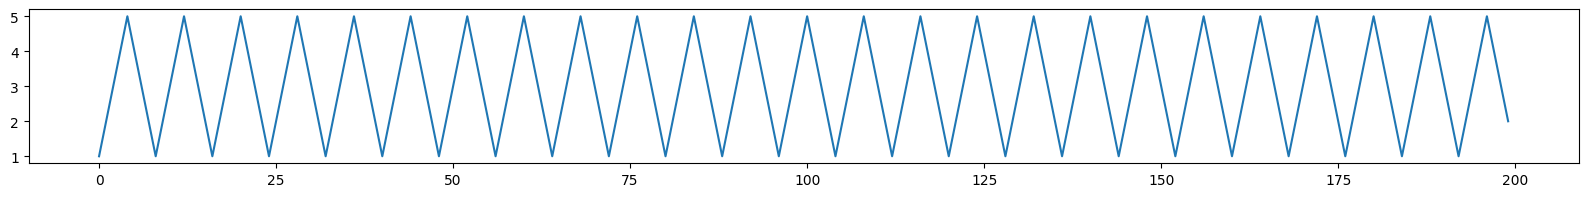

In [6]:
# Generate a Sample Time Series
ts_length = 25
time_series = []
for i in range(ts_length):
    time_series += [1,2,3,4,5,4,3,2]   

plt.figure(figsize=(20,2))
plt.plot(time_series)

In [7]:
len(time_series)

200

In [8]:
prediction_interval = 3

features = []
labels = []

# Data, label sequence
for i in range(len(time_series)-prediction_interval):
    features.append(time_series[i : i + prediction_interval])
    labels.append(time_series[i + prediction_interval])

# Train test split
train_size = int(len(time_series)*.90)

features_train = features[0:train_size]
features_test = features[train_size:]

labels_train = labels[:train_size]
labels_test = labels[train_size:]
    
    
# Reshape the data
# Reshpae the training data to number of observations, number of features, number of time series
X_train = np.array(features_train).reshape(len(features_train), prediction_interval, 1)
X_test = np.array(features_test).reshape(len(features_test), prediction_interval, 1)

# Reshpae the testing data to number of observations, number of values
y_train = np.array(labels_train).reshape(len(labels_train),1)

# Verify the shapes are compatable
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(np.array(labels_test).shape)

(180, 3, 1)
(180, 1)
(17, 3, 1)
(17,)


In [9]:
# Input Layer
input_layer = Input(shape = (None,1))

# First simple RNN layer
x = SimpleRNN(20, return_sequences=True)(input_layer)

# Second LSTM Layer - Long/short term memory
x = LSTM(20)(x)

# Dense feed forward layer
x = Dense(10)(x)

# Output_layer
output_layer = Dense(1)(x)

model = Model(input_layer,output_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 1)]         0         
                                                                 
 simple_rnn (SimpleRNN)      (None, None, 20)          440       
                                                                 
 lstm (LSTM)                 (None, 20)                3280      
                                                                 
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 3,941
Trainable params: 3,941
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=300, batch_size = 32)

Epoch 1/300
6/6 [==============================] - 2s 4ms/step - loss: 11.4138
Epoch 2/300
6/6 [==============================] - 0s 4ms/step - loss: 9.5174
Epoch 3/300
6/6 [==============================] - 0s 3ms/step - loss: 7.7440
Epoch 4/300
6/6 [==============================] - 0s 3ms/step - loss: 6.0590
Epoch 5/300
6/6 [==============================] - 0s 3ms/step - loss: 4.5284
Epoch 6/300
6/6 [==============================] - 0s 3ms/step - loss: 3.1722
Epoch 7/300
6/6 [==============================] - 0s 3ms/step - loss: 2.2470
Epoch 8/300
6/6 [==============================] - 0s 3ms/step - loss: 1.6844
Epoch 9/300
6/6 [==============================] - 0s 3ms/step - loss: 1.5146
Epoch 10/300
6/6 [==============================] - 0s 3ms/step - loss: 1.5282
Epoch 11/300
6/6 [==============================] - 0s 3ms/step - loss: 1.5125
Epoch 12/300
6/6 [==============================] - 0s 3ms/step - loss: 1.4549
Epoch 13/300
6/6 [==============================] - 0s 3ms/s

6/6 [==============================] - 0s 3ms/step - loss: 0.0628
Epoch 105/300
6/6 [==============================] - 0s 3ms/step - loss: 0.0617
Epoch 106/300
6/6 [==============================] - 0s 2ms/step - loss: 0.0579
Epoch 107/300
6/6 [==============================] - 0s 3ms/step - loss: 0.0548
Epoch 108/300
6/6 [==============================] - 0s 3ms/step - loss: 0.0531
Epoch 109/300
6/6 [==============================] - 0s 3ms/step - loss: 0.0497
Epoch 110/300
6/6 [==============================] - 0s 3ms/step - loss: 0.0479
Epoch 111/300
6/6 [==============================] - 0s 3ms/step - loss: 0.0465
Epoch 112/300
6/6 [==============================] - 0s 3ms/step - loss: 0.0413
Epoch 113/300
6/6 [==============================] - 0s 4ms/step - loss: 0.0383
Epoch 114/300
6/6 [==============================] - 0s 3ms/step - loss: 0.0354
Epoch 115/300
6/6 [==============================] - 0s 3ms/step - loss: 0.0314
Epoch 116/300
6/6 [==============================] - 0

6/6 [==============================] - 0s 3ms/step - loss: 4.2115e-05
Epoch 205/300
6/6 [==============================] - 0s 3ms/step - loss: 3.4892e-05
Epoch 206/300
6/6 [==============================] - 0s 3ms/step - loss: 3.5632e-05
Epoch 207/300
6/6 [==============================] - 0s 3ms/step - loss: 2.9434e-05
Epoch 208/300
6/6 [==============================] - 0s 3ms/step - loss: 2.9108e-05
Epoch 209/300
6/6 [==============================] - 0s 3ms/step - loss: 2.6779e-05
Epoch 210/300
6/6 [==============================] - 0s 3ms/step - loss: 2.3969e-05
Epoch 211/300
6/6 [==============================] - 0s 3ms/step - loss: 2.1533e-05
Epoch 212/300
6/6 [==============================] - 0s 2ms/step - loss: 1.9003e-05
Epoch 213/300
6/6 [==============================] - 0s 2ms/step - loss: 1.7179e-05
Epoch 214/300
6/6 [==============================] - 0s 2ms/step - loss: 1.6476e-05
Epoch 215/300
6/6 [==============================] - 0s 3ms/step - loss: 1.4503e-05
Epoch 

In [11]:
# Make predictions
predictions = model.predict(X_test)

1/1 [==============================] - 0s 393ms/step


In [12]:
# Reshape the predicted values to one dimention for easier plotting
predictions = predictions.reshape(predictions.shape[0])

In [13]:
# Plot actual values
df = pd.DataFrame({'value': labels_train}).reset_index()

prediction_index = []
for i in range(len(labels_test)):
    prediction_index.append(i + len(labels_train))
    
df_predict = pd.DataFrame({'index': prediction_index, 
                           'predicted': predictions, 'actual': labels_test})

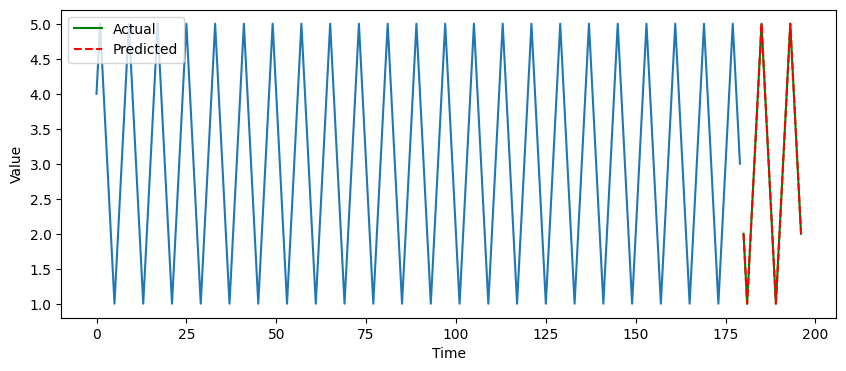

In [20]:
plt.figure(figsize=(10,4))

# Plot training values values
plt.plot(df['index'],df['value'])

# Plot test true labels
plt.plot(df_predict['index'], df_predict['actual'], label='Actual', color='green')

# Plot predicted values
plt.plot(df_predict['index'], df_predict['predicted'], label='Predicted', color='red',ls='--')

plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()